# NETFLIX ORIGINALS - Exploratory Data Analysis (860 FILMS)

- The purpose of this workbook is to conduct Exploratory Data Analysis on the Netflix Originals Dataset, in preparation for the next notebook which will be on IMDb Score Prediction.
- I hope to gain a better understanding of my Data through this analysis, and hope it guides me in building a more accurate predictive model.
- I also hope to extract some meaningful insights from the Data that could be used in a real life situation to guide decision making processes.
- I put together the Netflix Originals dataset in an earlier noebook titled "Dataset Creation".
- The data was sourced via web scraping as well as the OMDb API.
- NOTE: The data has already been cleaned prior to loading in.
---

In [175]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

In [176]:
netflix = pd.read_csv("netflix_long_plot.csv",index_col=0)
netflix.head(1)

,Title,Description,Genre,Rated,Running Time(mins),Release Date,Director,Cast,Primary Country,International,Lead Production Company,Multiple Production Companies,Wins,Nominations,IMDb Votes,IMDb Score,Plot
0,Beasts of No Nation,"A drama based on the experiences of Agu, a chi...","Drama, War",Mature Audiences,138,2015-09-03,Cary Joji Fukunaga,"Abraham Attah, Emmanuel Affadzi, Ricky Adelayitor",United States,0,Participant Media,1,31,59,84555.0,7.7,"Follows the journey of a young boy, Agu, who i..."


In [177]:
display(netflix.dtypes)
display(netflix.columns)
netflix = netflix.dropna()
length = len(netflix)
print(f"There are {length} data points in the Netflix Originals DataFrame")

Title                             object
Description                       object
Genre                             object
Rated                             object
Running Time(mins)                 int64
Release Date                      object
Director                          object
Cast                              object
Primary Country                   object
International                      int64
Lead Production Company           object
Multiple Production Companies      int64
Wins                               int64
Nominations                        int64
IMDb Votes                       float64
IMDb Score                       float64
Plot                              object
dtype: object

Index(['Title', 'Description', 'Genre', 'Rated', 'Running Time(mins)',
       'Release Date', 'Director', 'Cast', 'Primary Country', 'International',
       'Lead Production Company', 'Multiple Production Companies', 'Wins',
       'Nominations', 'IMDb Votes', 'IMDb Score', 'Plot'],
      dtype='object')

There are 860 data points in the Netflix Originals DataFrame


In [178]:
display(netflix.describe())
netflix.info()

,Running Time(mins),International,Multiple Production Companies,Wins,Nominations,IMDb Votes,IMDb Score
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000
mean,98.075581,0.188372,0.572093,3.245349,7.543023,26431.758140,6.241744
std,25.288742,0.391237,0.495063,15.436498,28.127918,60369.572358,0.923368
min,9.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.900000
25%,90.000000,0.000000,0.000000,0.000000,0.000000,2395.750000,5.675000
50%,98.500000,0.000000,1.000000,0.000000,1.000000,7093.500000,6.300000
75%,112.000000,0.000000,1.000000,1.000000,4.000000,25484.250000,6.900000
max,209.000000,1.000000,1.000000,275.000000,356.000000,735336.000000,8.900000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 860 entries, 0 to 880
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Title                          860 non-null    object 
 1   Description                    860 non-null    object 
 2   Genre                          860 non-null    object 
 3   Rated                          860 non-null    object 
 4   Running Time(mins)             860 non-null    int64  
 5   Release Date                   860 non-null    object 
 6   Director                       860 non-null    object 
 7   Cast                           860 non-null    object 
 8   Primary Country                860 non-null    object 
 9   International                  860 non-null    int64  
 10  Lead Production Company        860 non-null    object 
 11  Multiple Production Companies  860 non-null    int64  
 12  Wins                           860 non-null    int

- The average running time of a netflix original is 1h 38m
- The average number of Wins and Nominations is 3.2 and 7.5 respecively, however this is heavily skewed by hyper-successful productions.

---
# Univariate Analysis
## IMDb scores  (Target Variable)
- Important to understand the distribution prior to modelling

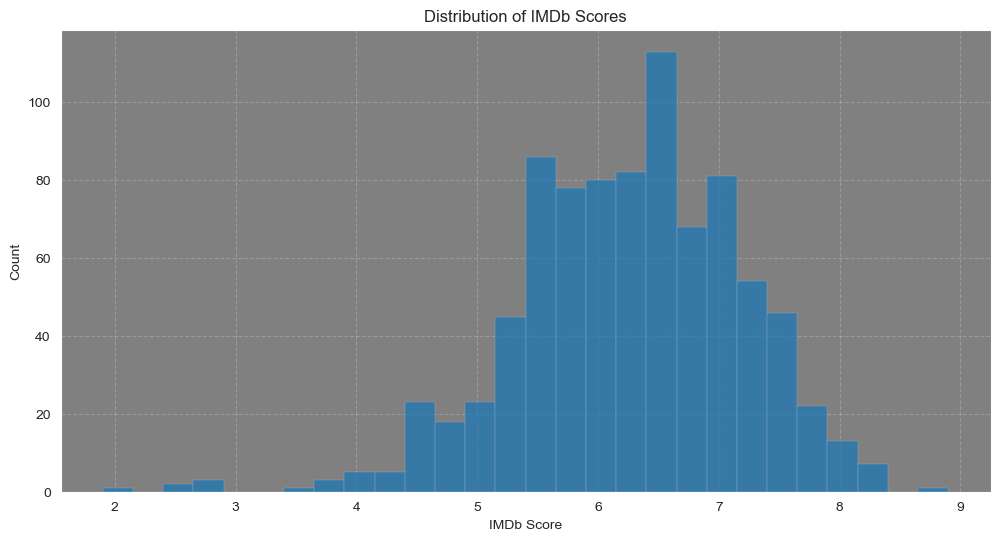

count    860.000000
mean       6.241744
std        0.923368
min        1.900000
25%        5.675000
50%        6.300000
75%        6.900000
max        8.900000
Name: IMDb Score, dtype: float64

In [179]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_facecolor('grey')

plot = sns.histplot(netflix["IMDb Score"], bins="auto",linewidth=0.1)
plot.set(title="Distribution of IMDb Scores", xlabel="IMDb Score", ylabel="Count")
plt.grid(True, linestyle="--", alpha=0.2)
plt.show()

netflix["IMDb Score"].describe()


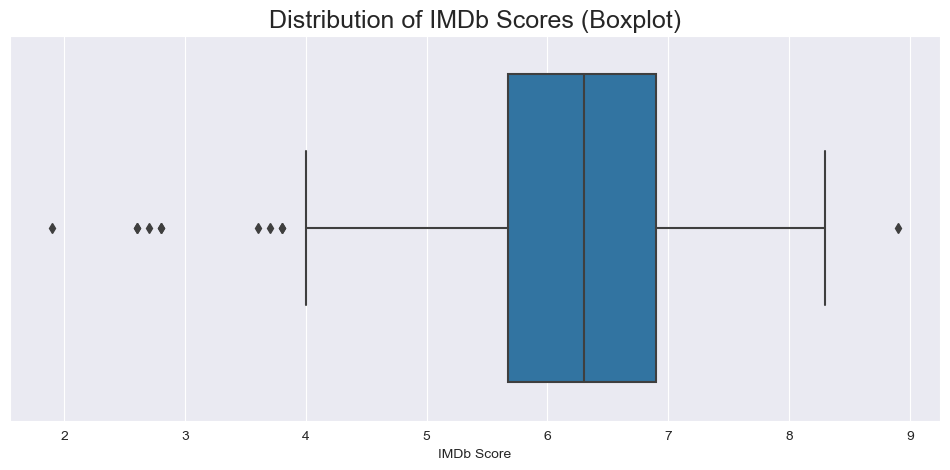

In [180]:
plt.figure(figsize=(12,5))
sns.boxplot(data = netflix, x="IMDb Score")
plt.title('Distribution of IMDb Scores (Boxplot)', fontsize=18)
plt.show()

In [181]:
print("Median: ",netflix["IMDb Score"].median())
print("Mode: ",netflix["IMDb Score"].mode()[0])

Median:  6.3
Mode:  6.3


In [182]:
print("Skew: ",netflix["IMDb Score"].skew())
print("Kurtosis:", netflix['IMDb Score'].kurt())

Skew:  -0.516119318747517
Kurtosis: 1.0488767303611946


- The mean IMDb Score is 6.24, the median and mode are BOTH 6.3.
- The standard deviation is 0.923 (average distance from the mean)
- The lowest rating is 1.9 and the highest rating is 8.9. The range of scores is 7.
- The highest rating is 8.9
- The 25th and 75th percentiles are 5.67 and 6.90 respectively. (IQR : 1.23)
- The data is skewed to the left, where the lower scores are (-0.56).
- Kurtosis score of 1.04, indicating lighter tails and a flatter peak than a normal distribution.

- Overall, the data is quite symmetrical, with a slight left skew. The standard deviation sits within a pretty narrow range, which means any models that are built dont need to account for lots of extreme values. There is a relatively large range of scores in the dataset, which make a model Random forest or GB more appropriate. A slight skew in the data means Random Forests could be useful for predicting scores down the line as the model does not assume any distribution.
---

## Description - Natural Language Processing

In [183]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

In [184]:
#Using apply and anonymous lambda functions to create a new column in the dataframe

netflix['Cleaned_Description'] = netflix['Description'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower())) #removing non-character and non-whitespace charaacters and replacing with "". x.lower() makes everything lowercase with the anon function.
display(netflix["Cleaned_Description"].head())
# Remove extra white spaces
netflix['Cleaned_Description'] = netflix['Cleaned_Description'].apply(lambda x: ' '.join(x.split())) #first, string is split(at linespaces) into list of words. ".join(" ")" then joins the list back into a string.
#This step ensure all words are separated only by a single space.
netflix["Cleaned_Description"].head()

0    a drama based on the experiences of agu a chil...
1    an outlaw who was raised by native americans d...
2    a fateful meeting with a mysterious stranger i...
3    a radio journalist and his technician get in o...
4    two downontheirluck guys decide to fake their ...
Name: Cleaned_Description, dtype: object

0    a drama based on the experiences of agu a chil...
1    an outlaw who was raised by native americans d...
2    a fateful meeting with a mysterious stranger i...
3    a radio journalist and his technician get in o...
4    two downontheirluck guys decide to fake their ...
Name: Cleaned_Description, dtype: object

#### Common Words

In [185]:
stop_words = set(stopwords.words("english")) #retrieve common stop words such as "the", "a", "it" etc.

all_descriptions = " ".join(netflix["Cleaned_Description"]) #Combines all strings together into a single string.
tokens = word_tokenize(all_descriptions) #puts every word from all_descriptions into a list, where each word is a string separated by a comma.
filtered_tokens = [token for token in tokens if token not in stop_words] #list comprehension - If a token is not in stop_words, the token is added to the new list, filtered_tokens
word_freq = Counter(filtered_tokens) #counts the occurence of each word in filtered_tokens using Counter(), stored in a dictionairy.
common_words = word_freq.most_common(15) #stores the top 15 most common words
print(common_words) #contains a list of tuples(word,frequency)

[('life', 106), ('young', 71), ('new', 68), ('two', 68), ('love', 65), ('family', 63), ('story', 54), ('world', 51), ('woman', 51), ('man', 49), ('one', 48), ('friends', 46), ('must', 45), ('years', 43), ('find', 40)]


('life', 'young', 'new', 'two', 'love', 'family', 'story', 'world', 'woman', 'man', 'one', 'friends', 'must', 'years', 'find') (106, 71, 68, 68, 65, 63, 54, 51, 51, 49, 48, 46, 45, 43, 40)


Text(0.5, 1.0, 'Most Common words in Netflix Original Descriptions')

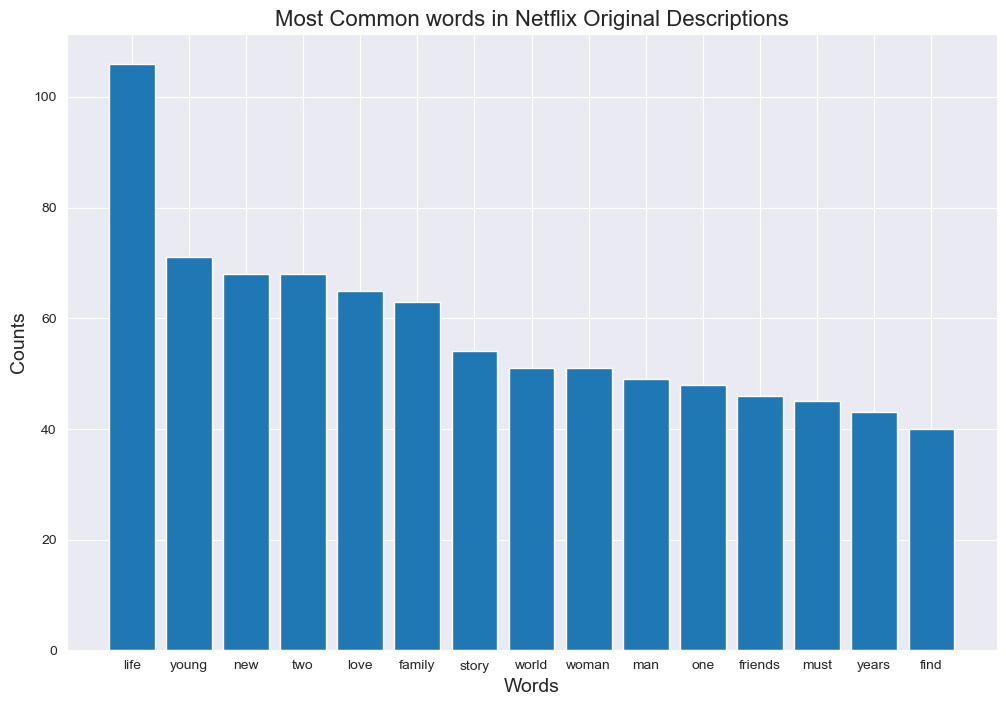

In [186]:
words, values = zip(*common_words) #by zipping with *, the words and frequencies are transposed into separate tuples in a list.
print(words, values) #for reference ^

plt.figure(figsize=(12,8))
plt.xlabel("Words", fontsize = 14)
plt.ylabel("Counts", fontsize = 14)
plt.bar(words, values)
plt.title("Most Common words in Netflix Original Descriptions", fontsize=16)

#### Common Phrases

- An n-gram is a sequence of n-tokens that occur.
- E.g. When ngrams=2, it is referred to as a bi-gram. 

In [187]:
from nltk import ngrams
bigrams = ngrams(filtered_tokens,2)
bigram_freq = Counter(bigrams)
common_bigrams = bigram_freq.most_common(15)
print(common_bigrams)

[(('new', 'york'), 17), (('high', 'school'), 17), (('young', 'woman'), 12), (('best', 'friends'), 9), (('los', 'angeles'), 8), (('best', 'friend'), 7), (('serial', 'killer'), 7), (('young', 'man'), 6), (('young', 'girl'), 6), (('around', 'world'), 6), (('film', 'follows'), 6), (('york', 'city'), 6), (('teenage', 'girl'), 6), (('tells', 'story'), 6), (('must', 'fight'), 5)]


<BarContainer object of 15 artists>

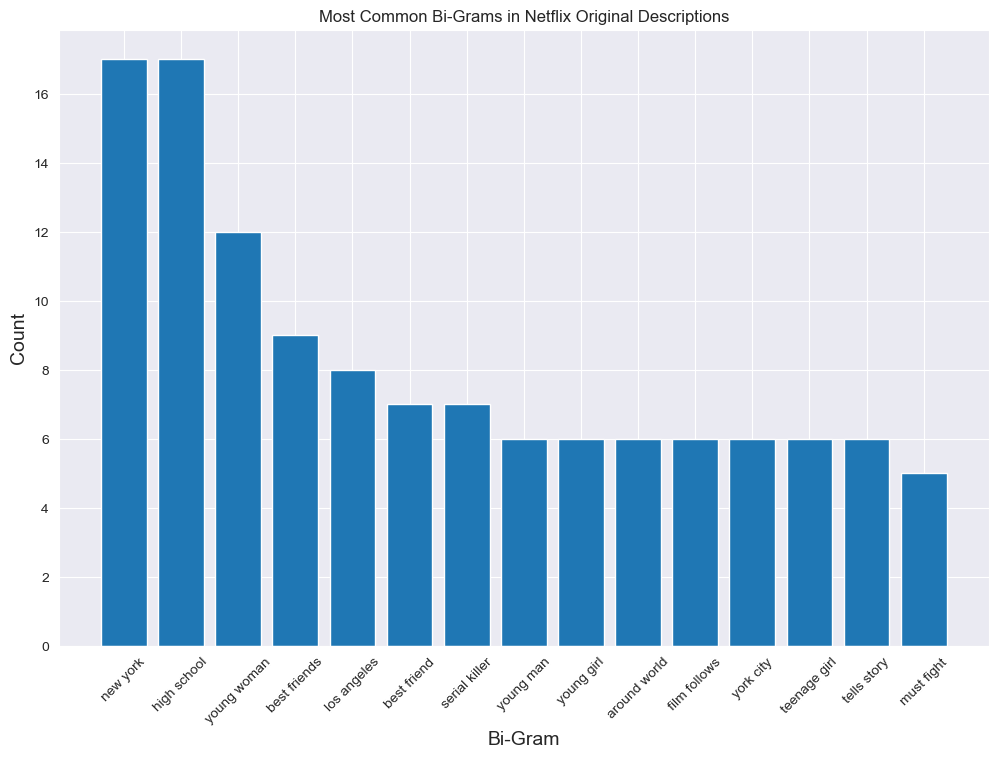

In [188]:
bigram, values = zip(*common_bigrams)
bigram = [' '.join(t) for t in bigram] #joins each word in each tuple with a space, removing the comma.
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.title("Most Common Bi-Grams in Netflix Original Descriptions")
plt.xlabel("Bi-Gram", fontsize =14)
plt.ylabel("Count", fontsize=14)
plt.bar(bigram, values)

In [189]:
tri_grams = ngrams(filtered_tokens,3)
trigram_freq = Counter(tri_grams)
common_trigrams = trigram_freq.most_common(10)
print(common_trigrams)

[(('new', 'york', 'city'), 6), (('two', 'best', 'friends'), 3), (('stuck', 'time', 'loop'), 2), (('disillusioned', 'assassin', 'accepts'), 2), (('assassin', 'accepts', 'one'), 2), (('accepts', 'one', 'last'), 2), (('one', 'last', 'hit'), 2), (('last', 'hit', 'hopes'), 2), (('hit', 'hopes', 'using'), 2), (('hopes', 'using', 'earnings'), 2)]


<BarContainer object of 10 artists>

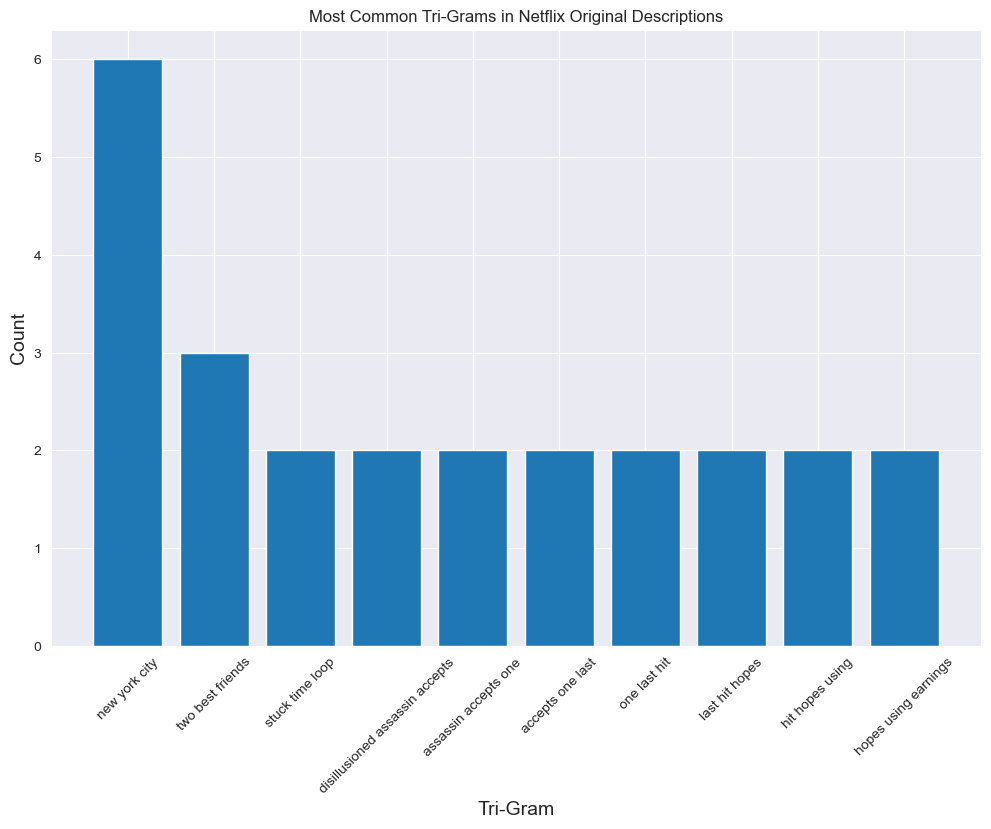

In [190]:
trigram, values = zip(*common_trigrams)
trigram = [" ".join(t) for t in trigram]
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.title("Most Common Tri-Grams in Netflix Original Descriptions")
plt.xlabel("Tri-Gram", fontsize =14)
plt.ylabel("Count", fontsize=14)
plt.bar(trigram, values)

- After Bi-Grams, most phrases are unique across the whole corpus
- Productions that are based around "New York", "best friends" and "high school" are very popular (in terms of existence) across the Netflix Originals Database.
- This information could be used to ascertain the uniqueness of new production ideas.
---

## Plot Analysis (Long Version of Description) - Sentiment Analysis
- New column containing sentiment scores will be created

In [191]:
netflix["Plot"][1]

"A white man, Tommy, raised by Indians is approached by his long lost father who tells him he needs $50,000 or he'll die at the hands of his former gang. Tommy goes on an incredible and ridiculous journey picking up his other 5 new brothers on the way in a race to save their dad."

In [192]:
from textblob import TextBlob

netflix["clean_plot"] = netflix["Plot"].str.replace('[^\w\s]', '').str.lower() #cleans the plot string - replaces any non characters or whitespaces with blank spaces instead.
netflix["plot_sentiment"] = netflix["clean_plot"].apply(lambda x: TextBlob(str(x)).sentiment.polarity) #returns a polarity score from -1 to 1.
netflix["plot_subjectivity"] = netflix["clean_plot"].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)#returns the subjectivity score.

C:\Users\oskar\AppData\Local\Temp\ipykernel_31844\3192076583.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  netflix["clean_plot"] = netflix["Plot"].str.replace('[^\w\s]', '').str.lower() #cleans the plot string - replaces any non characters or whitespaces with blank spaces instead.


Correlation: 0.0007739741879403901


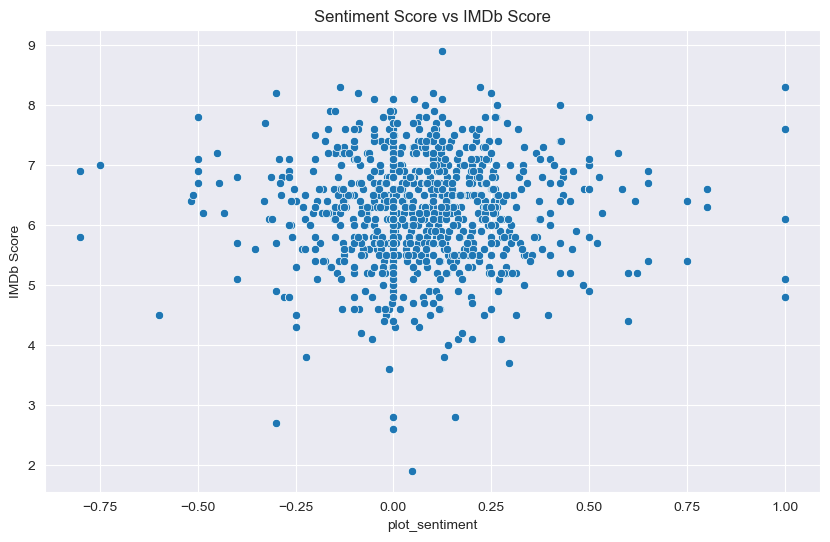

In [193]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='plot_sentiment', y='IMDb Score', data=netflix)
plt.title('Sentiment Score vs IMDb Score')

correlation = netflix['plot_sentiment'].corr(netflix['IMDb Score'])
print("Correlation:", correlation)

#There is no correlation between plot setiment and IMDb Score

Correlation: -0.07707307613546421


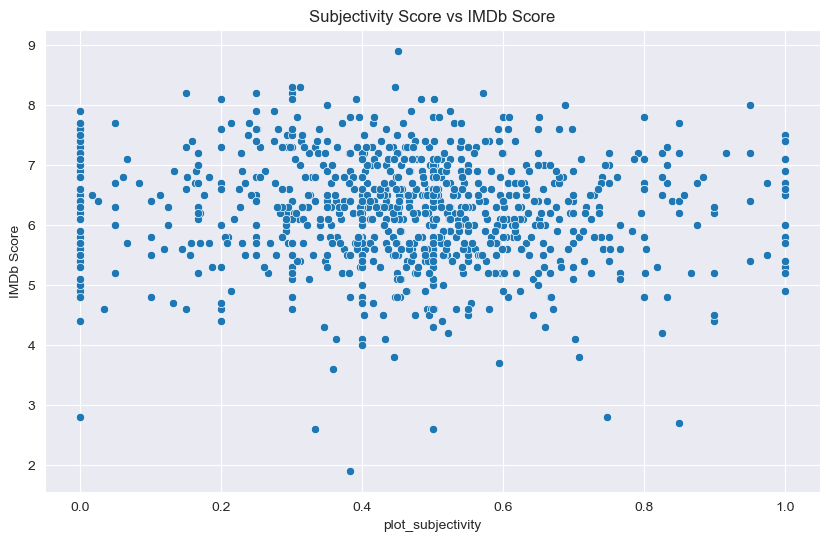

In [194]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='plot_subjectivity', y='IMDb Score', data=netflix)
plt.title('Subjectivity Score vs IMDb Score')

correlation = netflix['plot_subjectivity'].corr(netflix['IMDb Score'])
print("Correlation:", correlation)

- Indicates that as a films plot becomes more subjective and opinionated, the IMDb score decreases.
- However, this is a very weak correlation of -0.07

---

## What are the most common Genres?
- Genre may influence IMDb Scores. Some Genres may get consistently higher ratings.

In [195]:
from collections import Counter

all_genres = ','.join(netflix["Genre"]).split(",") #"".join separates the elements of the column into a single string which is separated by commas. .split, then takes this string and a splits it into a long list.
all_genres = [genre.strip() for genre in all_genres]  # list comprehension that Counter can parse over, by removing any leading or trailing whitespace.
genre_counts = Counter(all_genres) #counts the occurence of each genre in all_genre list
display(genre_counts)

sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=False)
sorted_genres

Counter({'Drama': 421,
         'War': 8,
         'Action': 131,
         'Adventure': 81,
         'Comedy': 293,
         'Family': 43,
         'Thriller': 85,
         'Romance': 135,
         'Music': 47,
         'Sci-Fi': 23,
         'History': 30,
         'Horror': 56,
         'Mystery': 64,
         'Crime': 161,
         'Biography': 79,
         'Animation': 39,
         'Fantasy': 24,
         'Western': 5,
         'Documentary': 195,
         'Short': 46,
         'Sport': 38,
         'Musical': 11,
         'News': 1,
         'Film-Noir': 1,
         'Reality-TV': 1})

[('News', 1),
 ('Film-Noir', 1),
 ('Reality-TV', 1),
 ('Western', 5),
 ('War', 8),
 ('Musical', 11),
 ('Sci-Fi', 23),
 ('Fantasy', 24),
 ('History', 30),
 ('Sport', 38),
 ('Animation', 39),
 ('Family', 43),
 ('Short', 46),
 ('Music', 47),
 ('Horror', 56),
 ('Mystery', 64),
 ('Biography', 79),
 ('Adventure', 81),
 ('Thriller', 85),
 ('Action', 131),
 ('Romance', 135),
 ('Crime', 161),
 ('Documentary', 195),
 ('Comedy', 293),
 ('Drama', 421)]

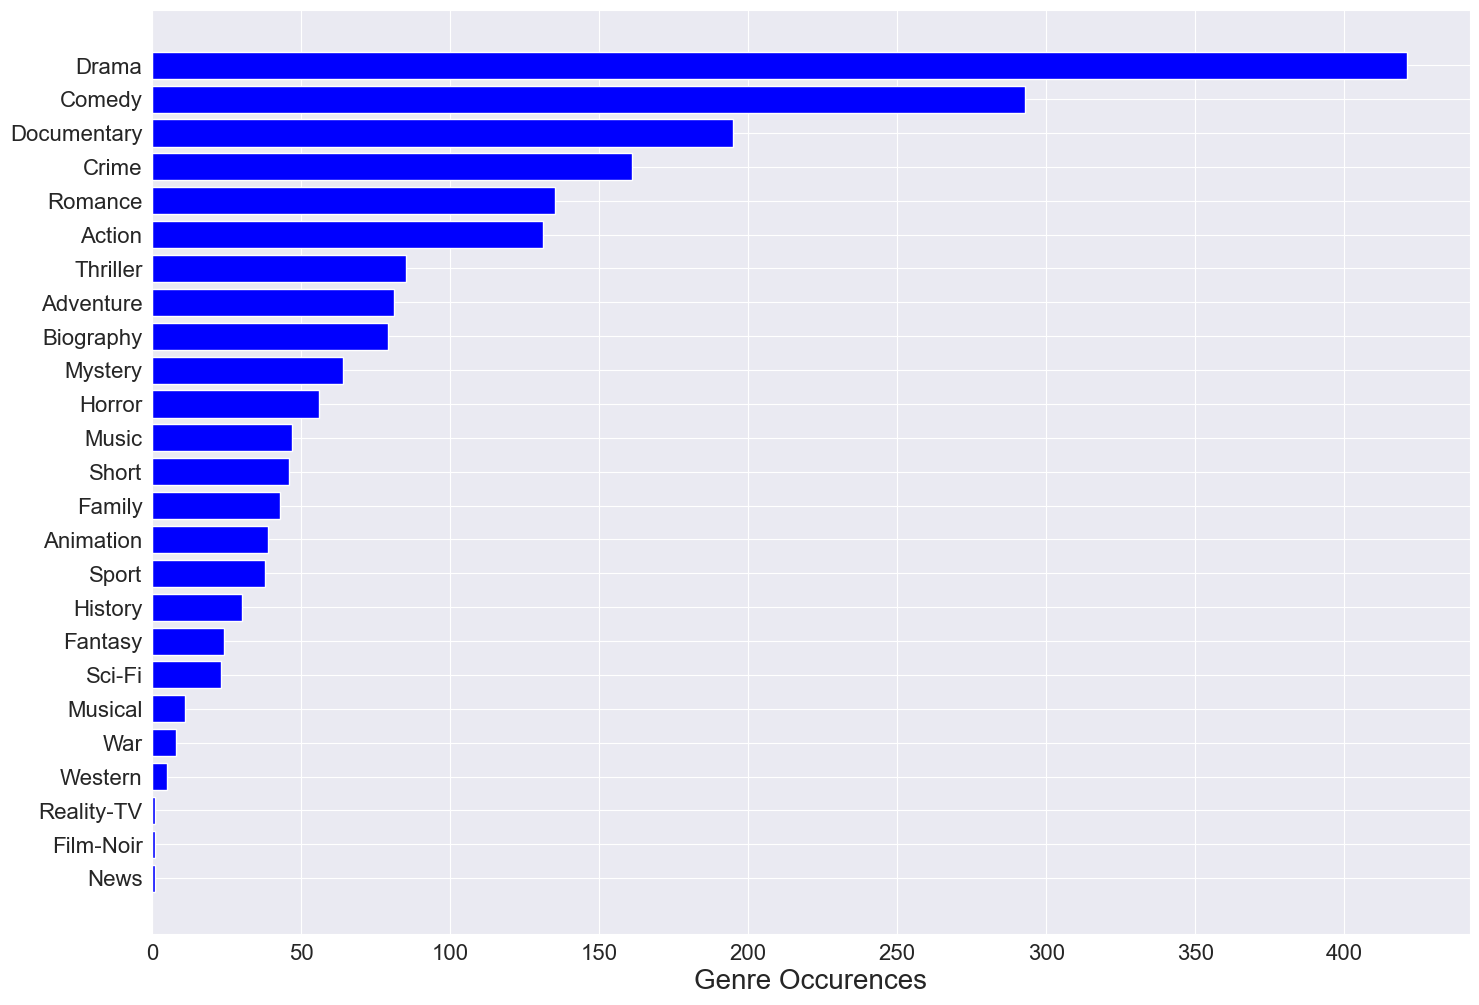

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

genres, counts = zip(*sorted_genres)

plt.figure(figsize=(17,12))
plt.barh(genres, counts, color="blue")
plt.xlabel("Genre Occurences", fontsize = 20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.show()

- Nearly half of all Netflix Original Productions are labelled as 'Drama', 300 are classed as 'Comedy' and 200 are classed as 'Documentary'.
- NOTE : Genre tags are not one per production. Most have more than one label assigned.
---

## Rated

[(0.0, 600.0)]

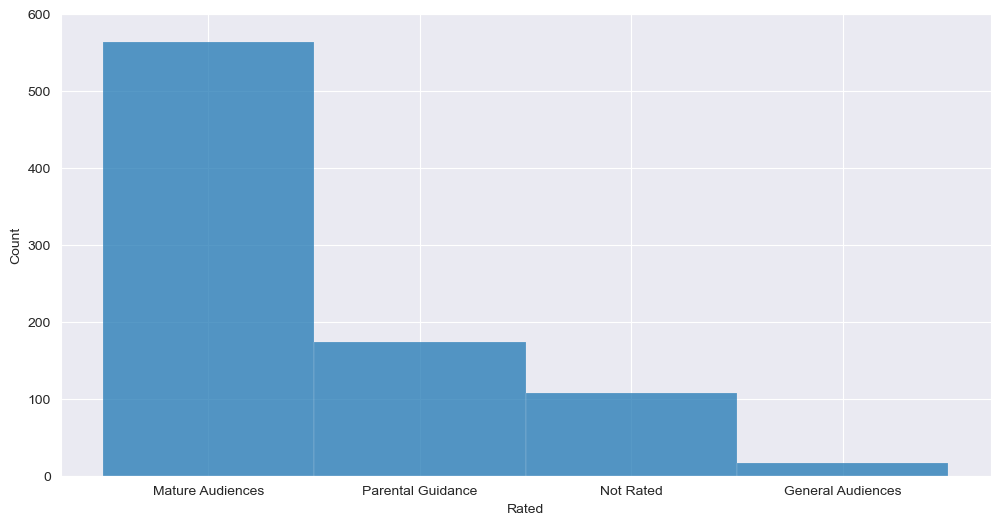

In [197]:
netflix["Rated"].value_counts()

fig, ax = plt.subplots(figsize=(12,6))
plot = sns.histplot(netflix["Rated"], bins="auto", linewidth=0.1)
plot.set(ylim=(0,600))

- "Mature Audiences" is by far the most common rating amongst Netflix Originals, followed by Parental Guidance.
---

## Running Time

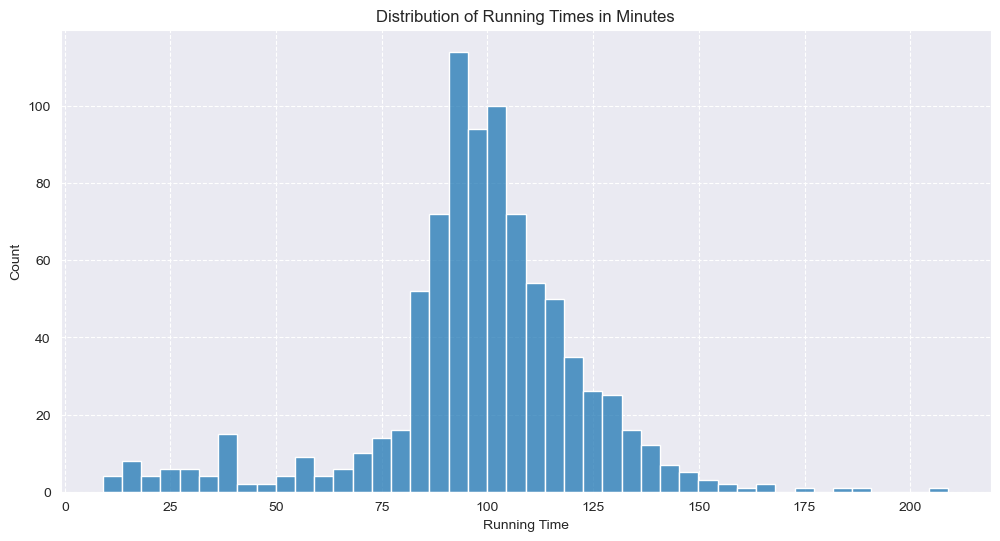

Running Time Distribution:
 count    860.000000
mean      98.075581
std       25.288742
min        9.000000
25%       90.000000
50%       98.500000
75%      112.000000
max      209.000000
Name: Running Time(mins), dtype: float64

Skew:  -0.7574383832923185
Kurtosis: 2.759879788249264


In [198]:
fig,ax = plt.subplots(figsize=(12,6))
plot = sns.histplot(netflix["Running Time(mins)"])
plot.set(title="Distribution of Running Times in Minutes", xlabel="Running Time")
plt.grid(True, linestyle="--")
plt.show()

print("Running Time Distribution:\n",netflix["Running Time(mins)"].describe())

print("\nSkew: ",netflix["Running Time(mins)"].skew())
print("Kurtosis:", netflix['Running Time(mins)'].kurt())

- There is a leftwards skew (-0.75). This is due to the presence of "short films" in the Netflix Originals Dataset
- Kurtosis score of 2.75, indicating light tails and and dull peak. This is a platykurtic distribution.
- The average Netflix Production is 1 hour 38 minutes long.
- The shortest film is 9 minutes long and the longest is 3 hours 29 minutes long.
---

## Release Date
- Netflix has only been making its own film/buying rights to films in recent history, mainly for films from recent history, explaining the heavy left skew that is seen here.

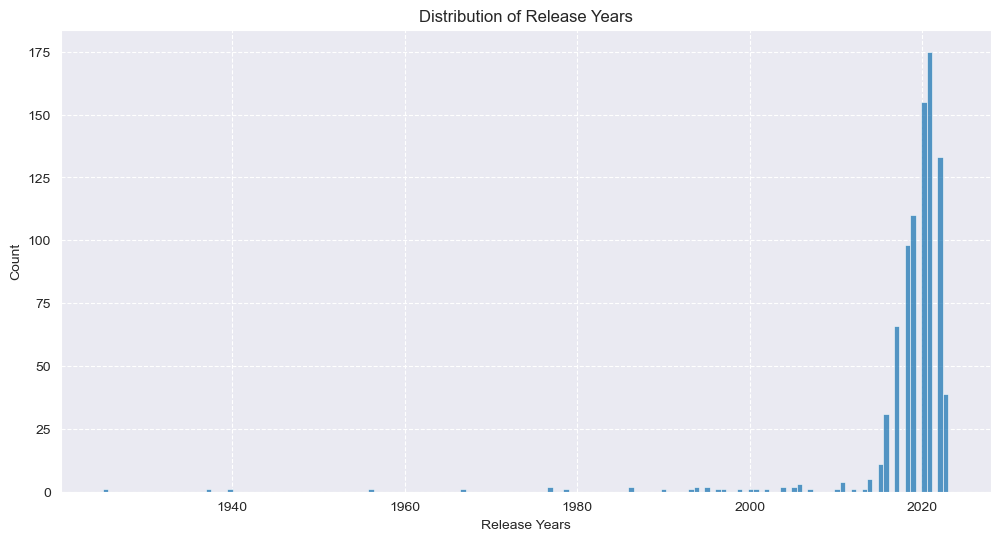

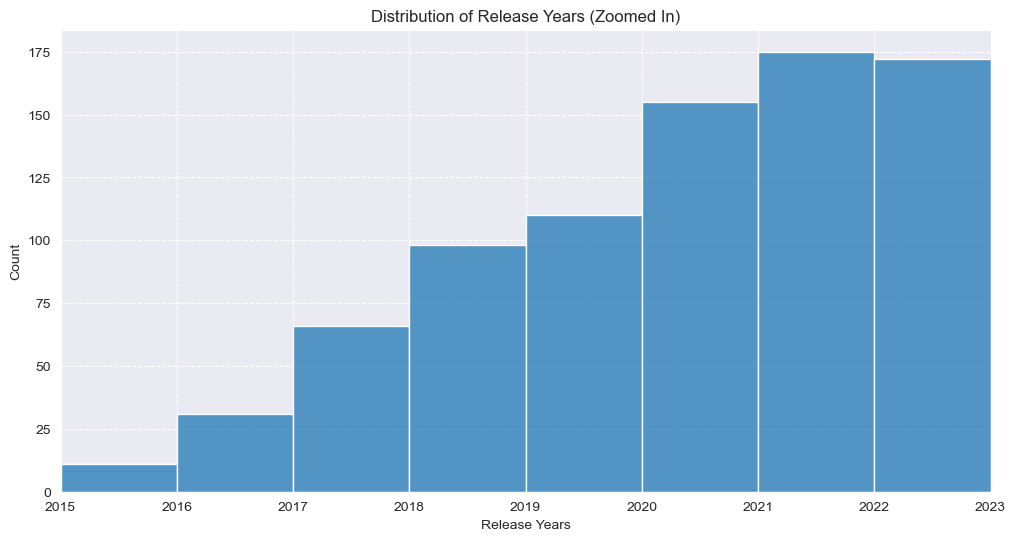

In [199]:
import numpy as np

netflix["Release Date"] = pd.to_datetime(netflix["Release Date"])
netflix["Release Year"] = netflix["Release Date"].apply(lambda x: x.year) #creating a year column

netflix["Release Month"] = netflix["Release Date"].apply(lambda x: x.month) #creating a month column

fig1,ax1 = plt.subplots(figsize=(12,6))
plot = sns.histplot(netflix["Release Year"])
plot.set(title="Distribution of Release Years", xlabel="Release Years")
plt.grid(True, linestyle="--")
plt.show()

fig2, ax2 = plt.subplots(figsize=(12, 6))

plot2 = sns.histplot(netflix["Release Year"],bins=range(2015,2024), ax=ax2)
plot2.set(title="Distribution of Release Years (Zoomed In)", xlabel="Release Years")
ax2.set_xlim(2015, 2023) 
plt.grid(True, linestyle="--")
plt.show()

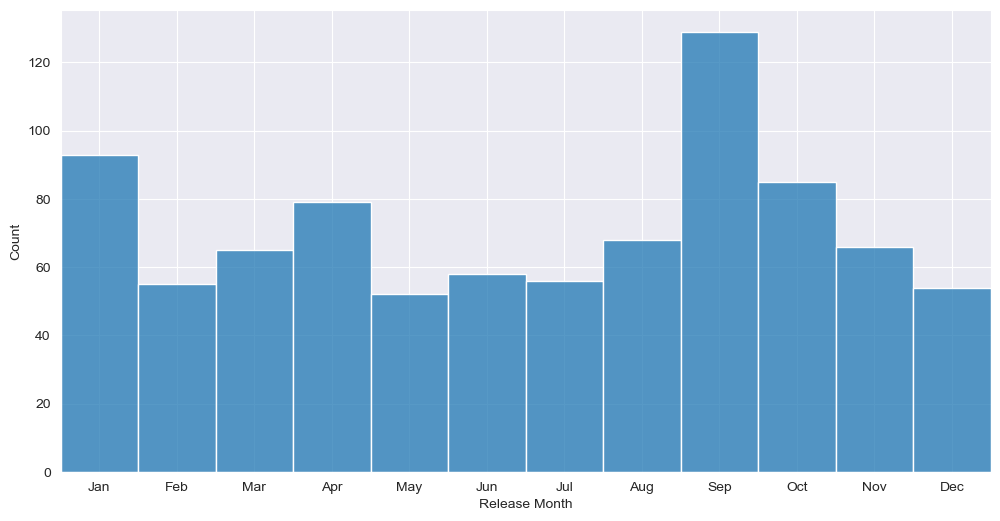

In [200]:
fig, ax = plt.subplots(figsize=(12,6))
plot = sns.histplot(netflix["Release Month"],bins=range(1, 14))
ax.set_xlim(1,13)

month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
ax.set_xticks([i + 0.5 for i in range(1, 13)])  # centralise labels
ax.set_xticklabels(month_names)

plt.show()

- Since 2015, Netflix Originals have been released more often each year. Releases peaked from 2021-2022.
- Netflix has acquired the rights to much older films, indicated by the first histogram.
- The vast majority of Netflix Originals are found from 2015-2023.
- September is the busiest time of the year for Netflix Original releases, whereas May is the quietest period.
---


## Director

In [201]:
netflix["Director"]=netflix["Director"].astype("string")
director_counts = netflix["Director"].value_counts()
director_counts[:9]

Chris Smith       4
Kunle Afolayan    4
Vince Marcello    3
Tyler Perry       3
Steve Brill       3
Leigh Janiak      3
Tyler Spindel     3
Bruno Garotti     3
McG               3
Name: Director, dtype: Int64

- Due to the sparse nature of this column, a new column will be created.
- If a film is made by a director who has more than one production already as a Netflix Director, will be assigned 1, else 0.

In [202]:
netflix_directors = pd.DataFrame(netflix["Director"].value_counts())
netflix_directors.reset_index(inplace=True)
netflix_directors.columns = ["Director","Count"]
netflix_directors

,Director,Count
0,Chris Smith,4
1,Kunle Afolayan,4
2,Vince Marcello,3
3,Tyler Perry,3
4,Steve Brill,3
...,...,...
783,Byun Sung-hyun,1
784,Jeremy Garelick,1
785,Jonás Cuarón,1
786,Steven K. Tsuchida,1


In [203]:
netflix_director = netflix_directors[netflix_directors["Count"]>1]
len(netflix_director) #61 unique directors have produced more than one production specifically for netflix.
netflix_director.head()

NetflixDirector = []
[NetflixDirector.append(director) for director in netflix_director["Director"]] #List comprehension joining netflix directors together

netflix["netflix_director"] = netflix["Director"].apply(lambda x: 1 if x in NetflixDirector else 0)
netflix.head()

,Title,Description,Genre,Rated,Running Time(mins),Release Date,Director,Cast,Primary Country,International,...,IMDb Votes,IMDb Score,Plot,Cleaned_Description,clean_plot,plot_sentiment,plot_subjectivity,Release Year,Release Month,netflix_director
0,Beasts of No Nation,"A drama based on the experiences of Agu, a chi...","Drama, War",Mature Audiences,138,2015-09-03,Cary Joji Fukunaga,"Abraham Attah, Emmanuel Affadzi, Ricky Adelayitor",United States,0,...,84555.0,7.7,"Follows the journey of a young boy, Agu, who i...",a drama based on the experiences of agu a chil...,follows the journey of a young boy agu who is ...,-0.087500,0.458333,2015,9,0
1,The Ridiculous 6,An outlaw who was raised by Native Americans d...,"Action, Adventure, Comedy",Mature Audiences,120,2015-12-11,Frank Coraci,"Adam Sandler, Terry Crews, Jorge Garcia",United States,0,...,51701.0,4.8,"A white man, Tommy, raised by Indians is appro...",an outlaw who was raised by native americans d...,a white man tommy raised by indians is approac...,0.075433,0.447078,2015,12,0
2,Pee-wee's Big Holiday,A fateful meeting with a mysterious stranger i...,"Comedy, Family",Parental Guidance,89,2016-03-17,John Lee,"Paul Reubens, Jordan Black, Doug Cox",United States,0,...,8470.0,6.1,A fateful meeting with a mysterious stranger i...,a fateful meeting with a mysterious stranger i...,a fateful meeting with a mysterious stranger i...,0.116667,0.577778,2016,3,0
3,Special Correspondents,A radio journalist and his technician get in o...,Comedy,Mature Audiences,100,2016-04-22,Ricky Gervais,"Ricky Gervais, Eric Bana, Vera Farmiga",Canada,1,...,25488.0,5.9,A New York radio reporter and his sound engine...,a radio journalist and his technician get in o...,a new york radio reporter and his sound engine...,0.224242,0.436364,2016,4,0
4,The Do-Over,Two down-on-their-luck guys decide to fake the...,"Action, Adventure, Comedy",Mature Audiences,108,2016-05-16,Steve Brill,"Adam Sandler, David Spade, Paula Patton",United States,0,...,49243.0,5.7,Max (Adam Sandler) and Charlie (David Spade) o...,two downontheirluck guys decide to fake their ...,max adam sandler and charlie david spade old s...,0.087045,0.407652,2016,5,1


In [204]:
netflix["netflix_director"].value_counts()

0    727
1    133
Name: netflix_director, dtype: int64

- The majority of productions that Netflix acquires, are made by unique lead directors.
- There are 133 productions where a production has a director who has been used more than once(Productions which use these directors are marked with a 1).


---
## Cast

In [205]:
from collections import Counter
display(netflix["Cast"].head()) #Cast column is a string format with actors separated by commas
netflix["Cast"] = netflix["Cast"].apply(lambda x: x.split(", ") if isinstance(x, str) else x) #If x is a string, it is split at the comma.
display(netflix["Cast"].head())

actor_list = [actor for sublist in netflix["Cast"] for actor in sublist] #nested list comprehension - places each actor into an extended list, which can then be processed by a Counter.
actor_freq = Counter(actor_list)
sorted_actor_freq = sorted(actor_freq.items(), key=lambda x: x[1], reverse=True)
sorted_actor_freq[1:11] #Print the top 10 most popular actors.

0    Abraham Attah, Emmanuel Affadzi, Ricky Adelayitor
1              Adam Sandler, Terry Crews, Jorge Garcia
2                 Paul Reubens, Jordan Black, Doug Cox
3               Ricky Gervais, Eric Bana, Vera Farmiga
4              Adam Sandler, David Spade, Paula Patton
Name: Cast, dtype: object

0    [Abraham Attah, Emmanuel Affadzi, Ricky Adelay...
1            [Adam Sandler, Terry Crews, Jorge Garcia]
2               [Paul Reubens, Jordan Black, Doug Cox]
3             [Ricky Gervais, Eric Bana, Vera Farmiga]
4            [Adam Sandler, David Spade, Paula Patton]
Name: Cast, dtype: object

[('Adam Sandler', 8),
 ('Kevin James', 4),
 ('Gary Oldman', 4),
 ('Noah Centineo', 4),
 ('Vanessa Hudgens', 4),
 ('Anthony Mackie', 4),
 ('Ana de Armas', 4),
 ('Jamie Foxx', 4),
 ('David Spade', 3),
 ('Robbie Amell', 3)]

In [206]:
#This section uses the actor frequencies to select the most popular actors.
actors_df = pd.DataFrame(sorted_actor_freq)
actors_df.columns = ["Name","Count"]
actors_df = actors_df[actors_df["Count"]>2]

popular_actors = [name for name in actors_df["Name"]]
popular_actors = popular_actors[1:] #Dont want to keep "No Cast Available"

netflix["Popular Actors"] = netflix["Cast"].apply(lambda x: 1 if any(actor in popular_actors for actor in x) else 0) #1 if popular actor in cast, otherwise a 0 is allocated.

netflix.head()

,Title,Description,Genre,Rated,Running Time(mins),Release Date,Director,Cast,Primary Country,International,...,IMDb Score,Plot,Cleaned_Description,clean_plot,plot_sentiment,plot_subjectivity,Release Year,Release Month,netflix_director,Popular Actors
0,Beasts of No Nation,"A drama based on the experiences of Agu, a chi...","Drama, War",Mature Audiences,138,2015-09-03,Cary Joji Fukunaga,"[Abraham Attah, Emmanuel Affadzi, Ricky Adelay...",United States,0,...,7.7,"Follows the journey of a young boy, Agu, who i...",a drama based on the experiences of agu a chil...,follows the journey of a young boy agu who is ...,-0.087500,0.458333,2015,9,0,0
1,The Ridiculous 6,An outlaw who was raised by Native Americans d...,"Action, Adventure, Comedy",Mature Audiences,120,2015-12-11,Frank Coraci,"[Adam Sandler, Terry Crews, Jorge Garcia]",United States,0,...,4.8,"A white man, Tommy, raised by Indians is appro...",an outlaw who was raised by native americans d...,a white man tommy raised by indians is approac...,0.075433,0.447078,2015,12,0,1
2,Pee-wee's Big Holiday,A fateful meeting with a mysterious stranger i...,"Comedy, Family",Parental Guidance,89,2016-03-17,John Lee,"[Paul Reubens, Jordan Black, Doug Cox]",United States,0,...,6.1,A fateful meeting with a mysterious stranger i...,a fateful meeting with a mysterious stranger i...,a fateful meeting with a mysterious stranger i...,0.116667,0.577778,2016,3,0,0
3,Special Correspondents,A radio journalist and his technician get in o...,Comedy,Mature Audiences,100,2016-04-22,Ricky Gervais,"[Ricky Gervais, Eric Bana, Vera Farmiga]",Canada,1,...,5.9,A New York radio reporter and his sound engine...,a radio journalist and his technician get in o...,a new york radio reporter and his sound engine...,0.224242,0.436364,2016,4,0,0
4,The Do-Over,Two down-on-their-luck guys decide to fake the...,"Action, Adventure, Comedy",Mature Audiences,108,2016-05-16,Steve Brill,"[Adam Sandler, David Spade, Paula Patton]",United States,0,...,5.7,Max (Adam Sandler) and Charlie (David Spade) o...,two downontheirluck guys decide to fake their ...,max adam sandler and charlie david spade old s...,0.087045,0.407652,2016,5,1,1


In [207]:
netflix["Popular Actors"].value_counts()

0    766
1     94
Name: Popular Actors, dtype: int64

- There are 35 actors who star in more than 2 Netflix Productions.
- There are 94 productions which contain a "popular actor", whereas 766 do not.
---


## Primary Country 

In [208]:
countries = pd.DataFrame(netflix["Primary Country"].value_counts())
countries = countries.reset_index()
countries.columns = ["Country","Count"]
countries.loc[countries["Count"] <6, "Country"] = "Other" #Countries that occur less than 6 times are re-allocated as other.

countries.head()

,Country,Count
0,United States,470
1,United Kingdom,67
2,India,53
3,Spain,26
4,France,26


In [209]:
other_count = 0
for index, row in countries.iterrows():
    if row["Country"] == "Other": #if a country in a row is labelled as other in the Country column...
        other_count += row["Count"] #if so, the value in the count column is added to other_count
        countries.drop(index, inplace=True) #row is dropped as it has now been accounted for.

countries = countries.append({"Country":"Other","Count":other_count}, ignore_index=True) #adds a new country called "Other", with the count that was stored in other_count
        
print(countries.tail())

         Country  Count
14  South Africa     10
15         Japan     10
16     Australia      7
17     Argentina      7
18         Other     57


C:\Users\oskar\AppData\Local\Temp\ipykernel_31844\426914491.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  countries = countries.append({"Country":"Other","Count":other_count}, ignore_index=True) #adds a new country called "Other", with the count that was stored in other_count


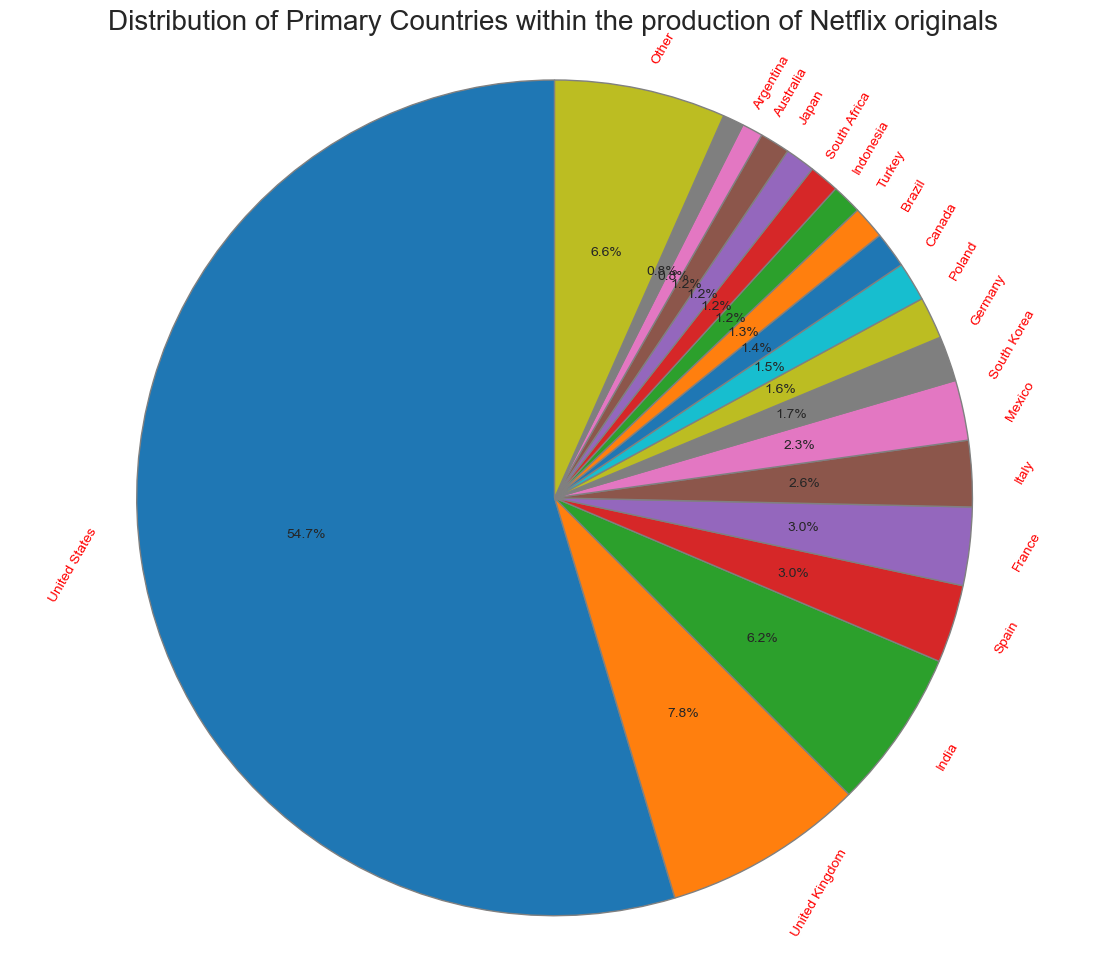

In [210]:
fig, ax = plt.subplots(figsize=(14,12))

wedges, texts, autotexts=ax.pie(countries["Count"], labels = countries["Country"], autopct='%1.1f%%', startangle=90) #1 decimal place
plt.axis("equal") #ensures circle shape
plt.title("Distribution of Primary Countries within the production of Netflix originals", fontsize=20)

for wedge in wedges:
    wedge.set(edgecolor='grey')
for text in texts:
    text.set(color='red', rotation=60)

C:\Users\oskar\AppData\Local\Temp\ipykernel_20132\1758160054.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(countries["Country"], rotation=45)


[Text(0, 0, 'United States'),
 Text(1, 0, 'United Kingdom'),
 Text(2, 0, 'India'),
 Text(3, 0, 'Spain'),
 Text(4, 0, 'France'),
 Text(5, 0, 'Italy'),
 Text(6, 0, 'Mexico'),
 Text(7, 0, 'South Korea'),
 Text(8, 0, 'Germany'),
 Text(9, 0, 'Poland'),
 Text(10, 0, 'Canada'),
 Text(11, 0, 'Brazil'),
 Text(12, 0, 'Turkey'),
 Text(13, 0, 'Indonesia'),
 Text(14, 0, 'South Africa'),
 Text(15, 0, 'Japan'),
 Text(16, 0, 'Australia'),
 Text(17, 0, 'Argentina'),
 Text(18, 0, 'Other')]

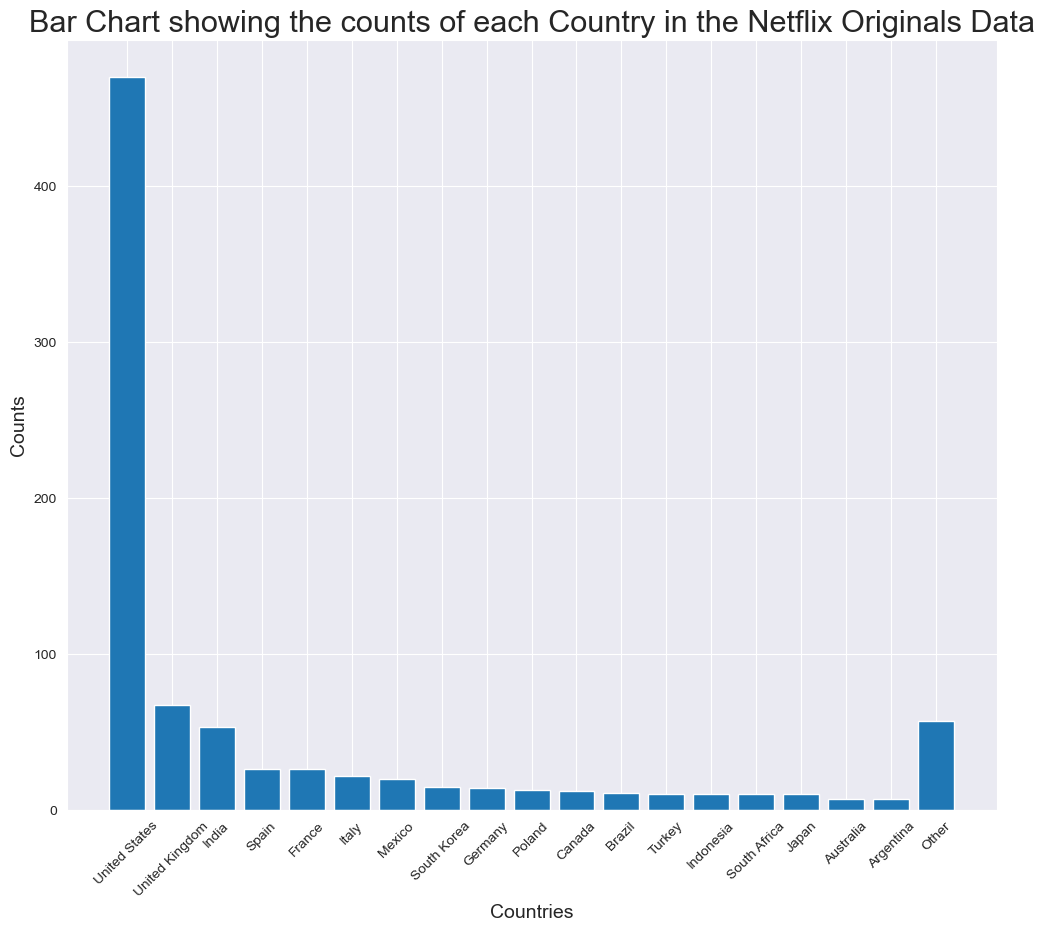

In [132]:
fig, ax = plt.subplots(figsize=(12,10))

ax.bar(countries["Country"],countries["Count"])

ax.set_xlabel("Countries", fontsize=14)
ax.set_ylabel("Counts", fontsize=14)
ax.set_title("Bar Chart showing the counts of each Country in the Netflix Originals Data", fontsize=22)
ax.set_xticklabels(countries["Country"], rotation=45)


- USA has the majority of Netflix Original Productions. Makes sense due to the Global domination of Hollywood.
- UK and India trail in 2nd and 3rd.
---


## International Productions

In [133]:
netflix.head()
netflix.columns

Index(['Title', 'Description', 'Genre', 'Rated', 'Running Time(mins)',
       'Release Date', 'Director', 'Cast', 'Primary Country', 'International',
       'Lead Production Company', 'Multiple Production Companies', 'Wins',
       'Nominations', 'IMDb Votes', 'IMDb Score', 'Plot',
       'Cleaned_Description', 'clean_plot', 'plot_sentiment',
       'plot_subjectivity', 'Release Year', 'Release Month',
       'netflix_director', 'Popular Actors'],
      dtype='object')

In [134]:
netflix["International"].value_counts(normalize=True) #normalize set to true to show proportions.


0    0.811628
1    0.188372
Name: International, dtype: float64

- 81% of productions were produced with only one nation involved.
- The rest of the productions had at least one other country involved. (~19%)
---

## Lead Production Company

In [135]:
netflix["Lead Production Company"].value_counts()

No Production Company Listed    118
Netflix                          53
Happy Madison Productions        12
MPCA                              9
RSVP Movies                       7
                               ... 
Labyrinthe Films                  1
MACRO                             1
Notorious Pictures                1
WWE Studios                       1
Basque Films                      1
Name: Lead Production Company, Length: 543, dtype: int64

In [136]:
len(netflix["Lead Production Company"].unique())

543

- 118 Titles do not have a production company listed. As a result, this column is under consideration to be dropped.
- Netflix have the most titles on Netflix that they have produced as Netflix Orignals (As the Lead Production company).
- Happy Madison Productions, MPCA and RSVP movies ranked well with 12, 9 and 7 productions respectively.
- There are 543 unique productions companies in the dataset, indicating that most companies only appear once.
--- 

## Wins and Nominations

In [137]:
netflix[netflix["Wins"]>250]

,Title,Description,Genre,Rated,Running Time(mins),Release Date,Director,Cast,Primary Country,International,...,IMDb Score,Plot,Cleaned_Description,clean_plot,plot_sentiment,plot_subjectivity,Release Year,Release Month,netflix_director,Popular Actors
165,Roma,A year in the life of a middle-class family's ...,Drama,Mature Audiences,135,2018-08-30,Alfonso Cuarón,"[Yalitza Aparicio, Marina de Tavira, Diego Cor...",Mexico,1,...,7.7,Cleo is one of two domestic workers who help A...,a year in the life of a middleclass familys ma...,cleo is one of two domestic workers who help a...,0.108333,0.370833,2018,8,0,0
608,The Power of the Dog,Charismatic rancher Phil Burbank inspires fear...,"Drama, Western",Mature Audiences,126,2021-09-02,Jane Campion,"[Benedict Cumberbatch, Kirsten Dunst, Jesse Pl...",New Zealand,1,...,6.8,"Severe, pale-eyed, handsome, Phil Burbank is b...",charismatic rancher phil burbank inspires fear...,severe paleeyed handsome phil burbank is bruta...,0.043778,0.680090,2021,9,0,1


Text(0.5, 1.0, 'Distribution of Nominations (Boxplot)')

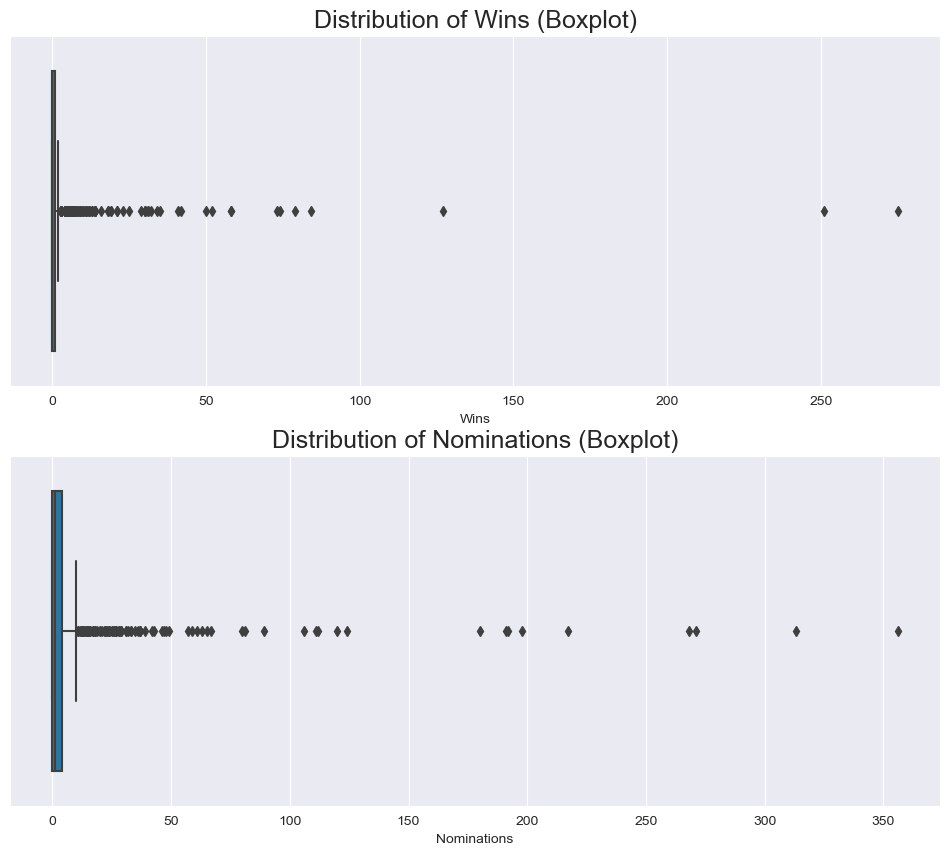

In [138]:
fig, axes = plt.subplots(2,1, figsize=(12, 10))

sns.boxplot(data=netflix, x="Wins", ax=axes[0])
axes[0].set_title('Distribution of Wins (Boxplot)', fontsize=18)

sns.boxplot(data=netflix, x="Nominations", ax=axes[1])
axes[1].set_title('Distribution of Nominations (Boxplot)', fontsize=18)

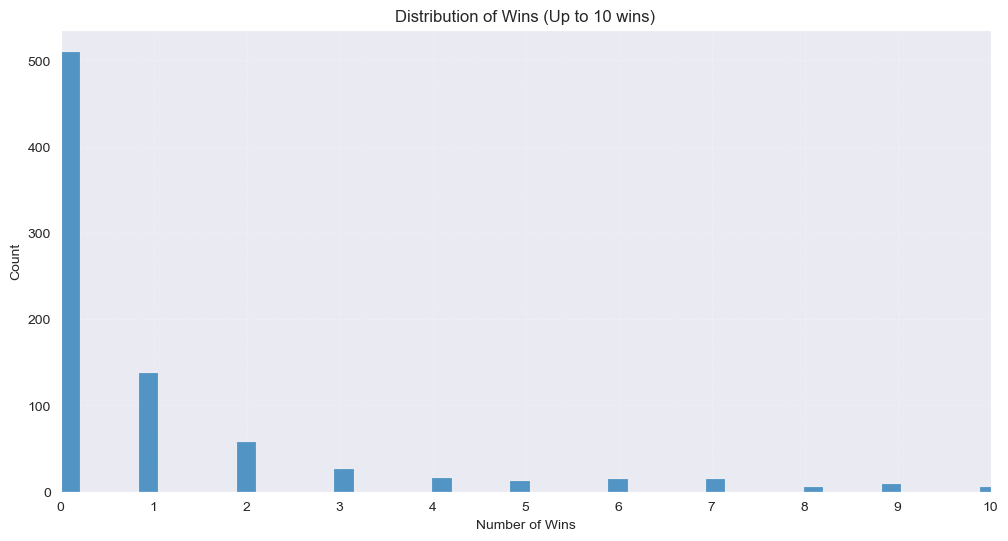

In [139]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(netflix["Wins"] ,bins="auto", linewidth=0.1)
ax.set_xlim(0,10)
ax.set_xticks(np.arange(0, 11, 1))
ax.set(title="Distribution of Wins (Up to 10 wins)", xlabel="Number of Wins", ylabel="Count")

plt.grid(True, linestyle="--", alpha=0.2)
plt.show()

- Most films do not win or get nominated for any awards. The average number of Wins and Nominations is greatly increased by outlier films who get 100's of both.
- As seen from the boxplots, even winning just one award would make a film an outlier.
- Very skewed distribution of Wins and Nominations
---

## IMDb Votes
IMDb votes can be treated like a pseudo Box Office return. Netflix Originals do not have Box Office returns as they are streamed online, not in theatres.

In [140]:
netflix["IMDb Votes"].describe()

count       860.000000
mean      26431.758140
std       60369.572358
min          12.000000
25%        2395.750000
50%        7093.500000
75%       25484.250000
max      735336.000000
Name: IMDb Votes, dtype: float64

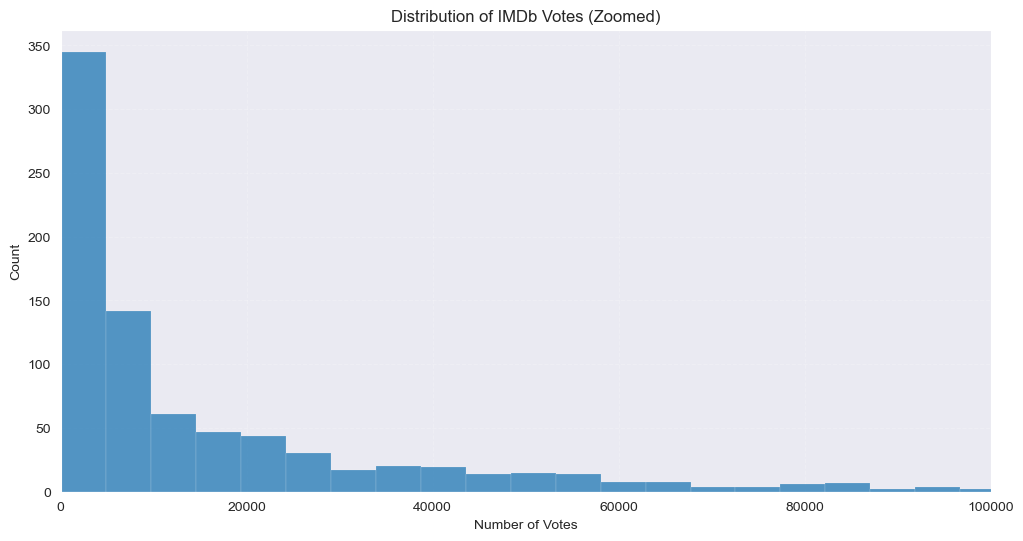

In [141]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(netflix["IMDb Votes"] ,bins="auto", linewidth=0.1)
ax.set_xlim(0,100000)
#ax.set_xticks(np.arange(0, 11, 1))
ax.set(title="Distribution of IMDb Votes (Zoomed)", xlabel="Number of Votes", ylabel="Count")

plt.grid(True, linestyle="--", alpha=0.2)
plt.show()

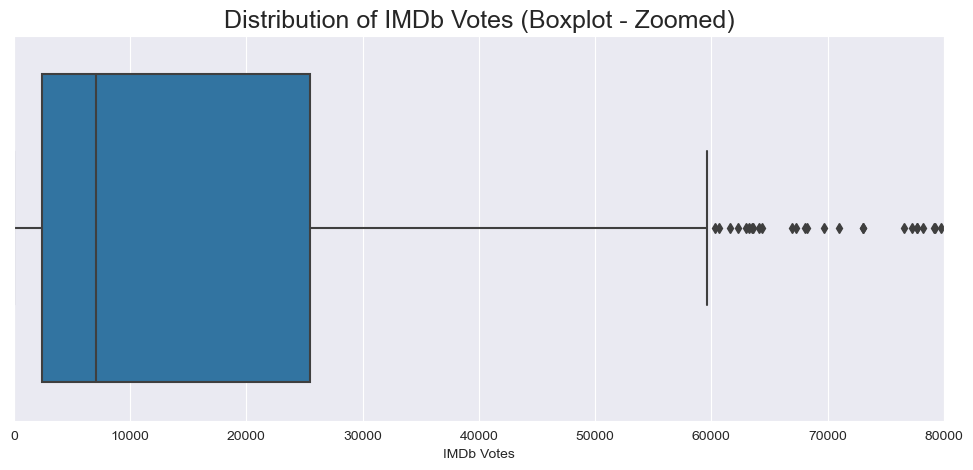

In [142]:
plt.figure(figsize=(12,5))
sns.boxplot(data = netflix, x="IMDb Votes")
plt.xlim(0,80000)
plt.title('Distribution of IMDb Votes (Boxplot - Zoomed)', fontsize=18)
plt.show()

In [143]:
print("Skew: ",netflix["IMDb Votes"].skew())
print("Kurtosis:", netflix['IMDb Votes'].kurt())

Skew:  6.454721025156177
Kurtosis: 56.49306220383827


- The mean number of Votes on a film is 26,431.
- The median number of votes is 7093.
- The least reviewed film has 12 reviews.
- The most reviewed film has 735,336 reviews
- Most productions have less than 20,000 votes.
- Skew of 6.45 is much greater than 1. Indicates a highly skewed distribution to the right.
- Kurtosis value of 56.49. There arent just a few outliers, the tails are heavy themselves.
---

# Bivariate and Multivariate Analysis

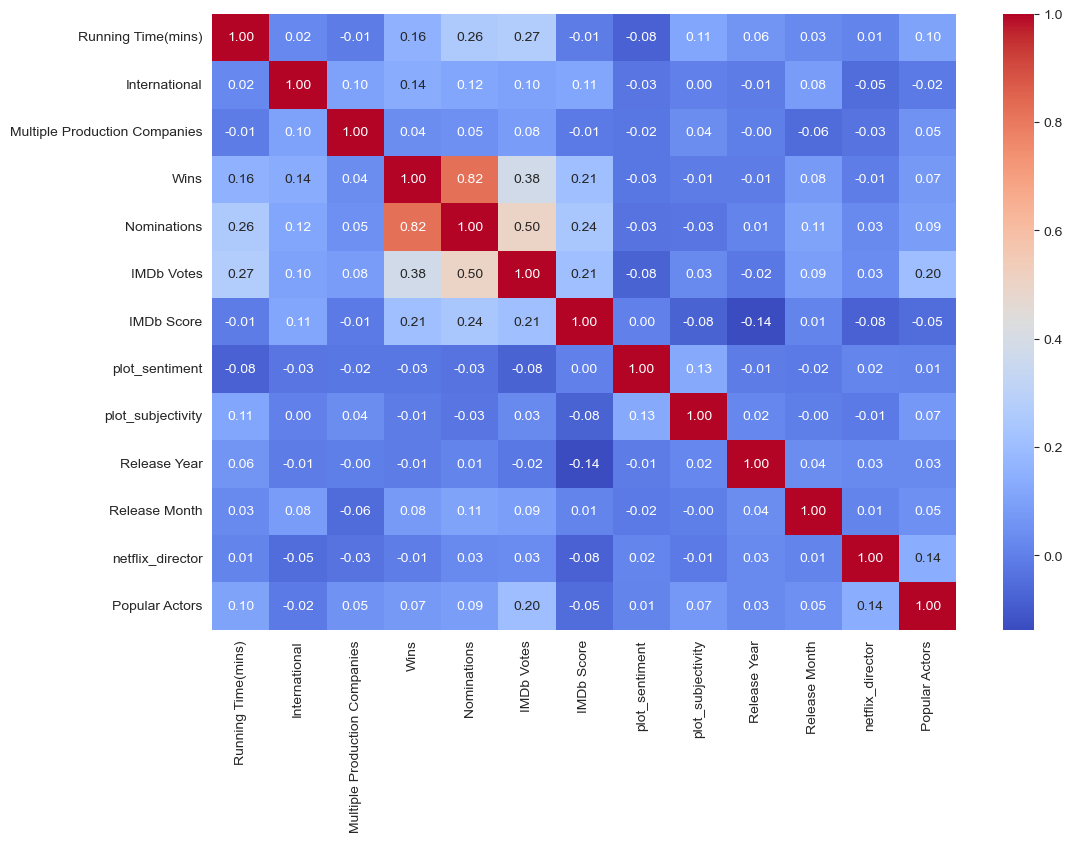

In [144]:
correlation_matrix = netflix.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()
#Useful for determining collinearity between variables.

In [145]:
correlation_matrix

,Running Time(mins),International,Multiple Production Companies,Wins,Nominations,IMDb Votes,IMDb Score,plot_sentiment,plot_subjectivity,Release Year,Release Month,netflix_director,Popular Actors
Running Time(mins),1.000000,0.024328,-0.011827,0.156757,0.257157,0.267000,-0.012265,-0.083513,0.112992,0.058465,0.027233,0.012336,0.102610
International,0.024328,1.000000,0.098096,0.137295,0.115416,0.098974,0.113875,-0.026658,0.004563,-0.009365,0.084104,-0.049788,-0.016269
Multiple Production Companies,-0.011827,0.098096,1.000000,0.038432,0.048641,0.083268,-0.014358,-0.023866,0.037873,-0.001241,-0.056501,-0.033073,0.054406
Wins,0.156757,0.137295,0.038432,1.000000,0.820502,0.378985,0.205352,-0.025284,-0.009349,-0.009136,0.078585,-0.007636,0.072694
Nominations,0.257157,0.115416,0.048641,0.820502,1.000000,0.500816,0.238943,-0.034379,-0.030458,0.010913,0.105203,0.027774,0.086958
IMDb Votes,0.267000,0.098974,0.083268,0.378985,0.500816,1.000000,0.208680,-0.076302,0.029765,-0.021953,0.093297,0.032731,0.204426
IMDb Score,-0.012265,0.113875,-0.014358,0.205352,0.238943,0.208680,1.000000,0.000774,-0.077073,-0.137516,0.010775,-0.083469,-0.052595
plot_sentiment,-0.083513,-0.026658,-0.023866,-0.025284,-0.034379,-0.076302,0.000774,1.000000,0.125311,-0.012661,-0.015943,0.017247,0.012148
plot_subjectivity,0.112992,0.004563,0.037873,-0.009349,-0.030458,0.029765,-0.077073,0.125311,1.000000,0.019194,-0.002681,-0.013174,0.067734
Release Year,0.058465,-0.009365,-0.001241,-0.009136,0.010913,-0.021953,-0.137516,-0.012661,0.019194,1.000000,0.036825,0.028808,0.029458


- Nominations and Wins are both moderately correlated with IMDb Score (0.238, 0.205).
- IMDb Votes (0.20) - popular films are more likely to be rated highly.
- International (0.113) - International films receive a slight boost to IMDb Scores.
- Running Time and MPC have tiny amounts of correlation. Little to no linear influence on IMDb score.
- Release Year (-0.13) : Newer movies tend to be rated lower than older movies.
- netflix_director(-0.08) : Suggests that movies directed by these actors receive lower scores.
- Although models such as Linear Regression would struggle with this info due to collinearity, more complex models can see more complex patterns in the data.
---

## Numeric Variables and IMDb Scores


The Pearson correlation score for Running Time(mins) is -0.012264879688074463
The Pearson correlation score for Wins is 0.20535189762401374
The Pearson correlation score for Nominations is 0.23894349045504995
The Pearson correlation score for IMDb Votes is 0.20867957463099568
The Pearson correlation score for Release Year is -0.1375160594495968
The Pearson correlation score for Release Month is 0.01077522239468319


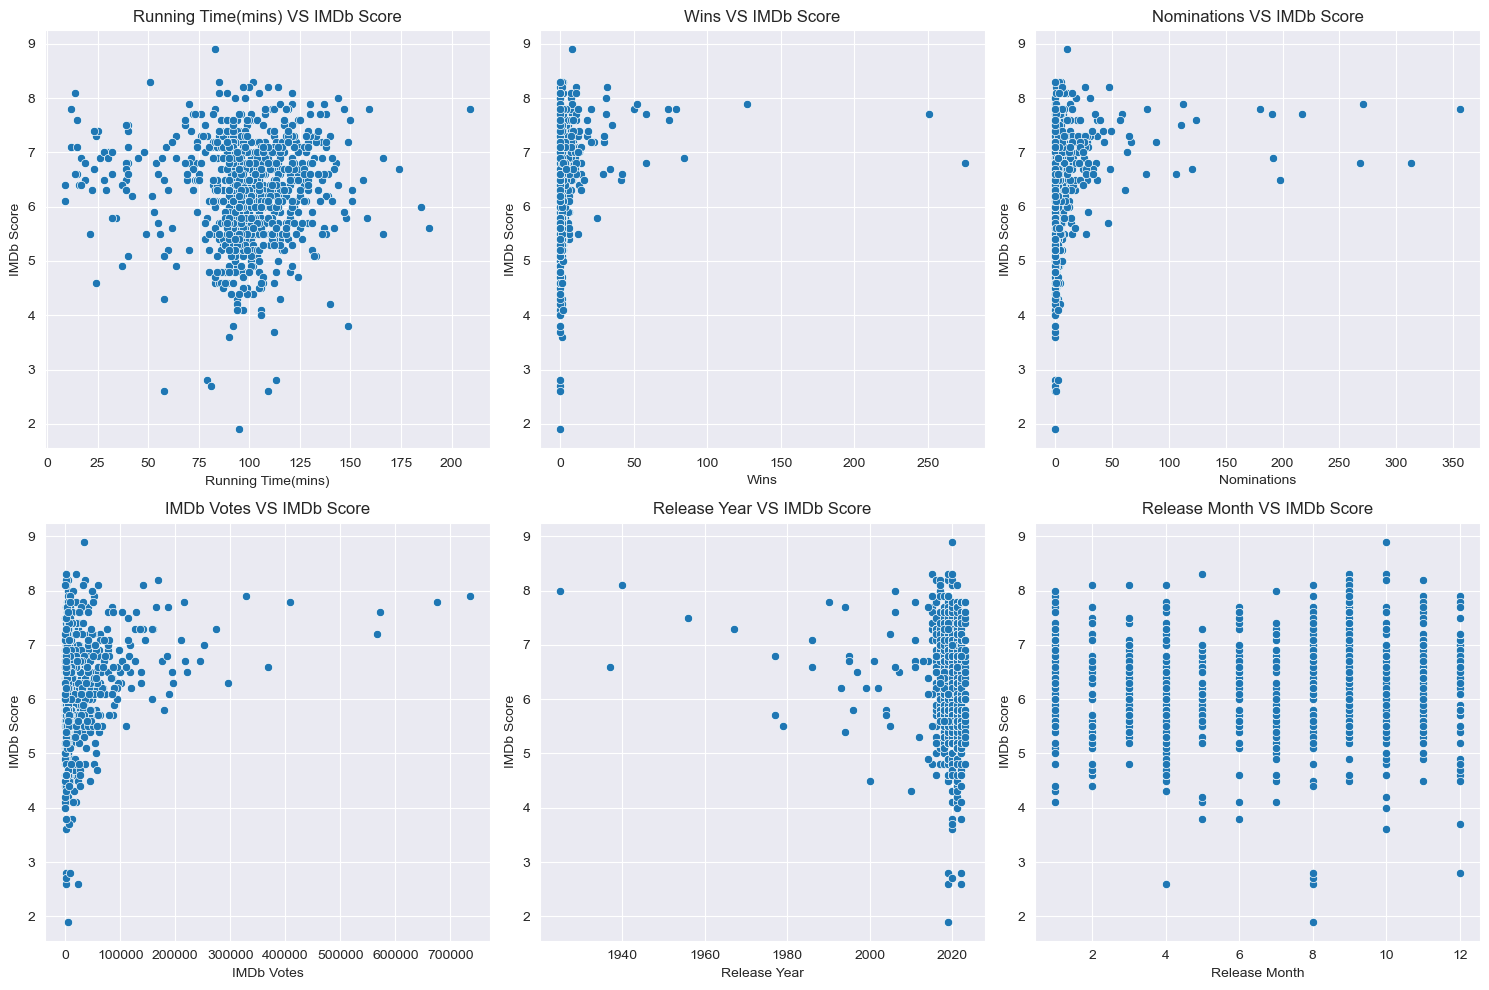

In [215]:
numeric_vars = ["Running Time(mins)","Wins","Nominations", "IMDb Votes","Release Year","Release Month" ]
n = len(numeric_vars)
n_rows = (n + 2) // 3 #I want 3 columns per row in subplot

plt.figure(figsize=(15, 5 * n_rows))

for i,var in enumerate(numeric_vars):
    plt.subplot(n_rows, 3, i+1) #rows, columns, adding 1 as needs to be 1 indexed.
    sns.scatterplot(data = netflix, x=var, y="IMDb Score")
    plt.title( f"{var} VS IMDb Score")
    corr = netflix[var].corr(netflix["IMDb Score"])
    print(f"The Pearson correlation score for {var} is {corr}")

plt.tight_layout()
plt.show()

- RUNNING TIME:  The pearson r coefficient for Running TIme is very close to 0. ANOVA will be conducted below to see if there are variations within the group.
- WINS & NOMINATIONS: As the number of wins/nominations increases, so does the IMDb Score.
- IMDB VOTES : As the number of votes increases, so does the IMDb Score.
- RELEASE DATE: Newer films tend to be rated lower, whilst films released later in the year perform slightly worse on average.

### Do longer or shorter movies have higher scores generally?

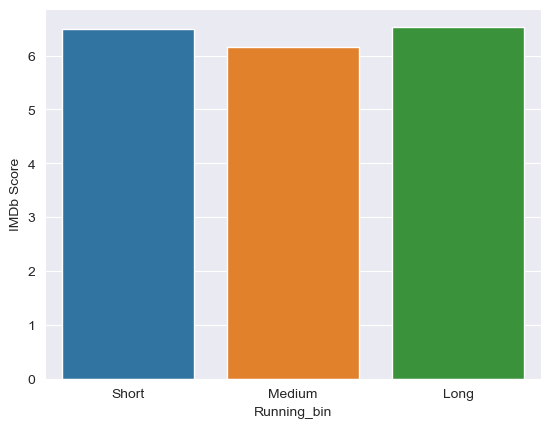

In [147]:
bins = [0,60,120,209]
labels = ["Short", "Medium", "Long"]
netflix["Running_bin"] = pd.cut(netflix["Running Time(mins)"], bins=bins, labels = labels)

bin_scores =  netflix.groupby("Running_bin")["IMDb Score"].mean().reset_index()
sns.barplot(x="Running_bin", y="IMDb Score", data = bin_scores)
plt.show()

- Null Hypothesis 
 : The means of IMDb scores for Short, Medium, and Long films are equal.
- Alternative Hypothesis 
 : At least one category of films has a different average IMDb score.

In [148]:
import scipy.stats as stats
#creating filters for various film lengths.
short_films = netflix[netflix['Running_bin'] == 'Short']['IMDb Score']
medium_films = netflix[netflix['Running_bin'] == 'Medium']['IMDb Score']
long_films = netflix[netflix['Running_bin'] == 'Long']['IMDb Score']

f_stat, p_value = stats.f_oneway(short_films, medium_films, long_films)

print(f"p-value:{p_value}\nf-stat: {f_stat}")

p-value:1.3966318826690546e-05
f-stat: 11.325957381748193


- We can reject the null hypothesis, as p is very far below the significance level of 0.05.
- The f-stat measures how much the means of each group differ from the mean of the overall data set. In this case it is far above 1 so it supports the p value (reject null).
- We now want to see which groups are significantly different, so we will use pairwise t-tests as a post hoc. 
Independent T Tests

In [149]:
tests = 3
alpha = 0.05/3 #bonferroni adjustment for multiple comparison groups.
alpha

t_stat, p_value = stats.ttest_ind(short_films, medium_films)
print(f"Short vs Medium: t-stat = {t_stat},p-value = {p_value}")

t_stat, p_value = stats.ttest_ind(medium_films, long_films)
print(f"Medium vs Long: t-stat = {t_stat},p-value = {p_value}")

t_stat, p_value = stats.ttest_ind(short_films, long_films)
print(f"Short vs Long: t-stat = {t_stat},p-value = {p_value}")


Short vs Medium: t-stat = 2.785665067098601, p-value = 0.005479209549376023
Medium vs Long: t-stat = -4.136158209673901, p-value = 3.909167060049167e-05
Short vs Long: t-stat = -0.28684776587240346, p-value = 0.7745481724816775


-  +ve t stat indicates first group has a higher mean and vice versa for -ve.

- Short VS Medium:
    t = 2.78 - indicates that movies categorised as short tend to have higher IMDb scores than Medium length films. p value (0.0054) is less than adjusted alpha therefore result is significant.
- Medium VS Long:
    t=-4.13 - Long films tend to have higher IMDb scores than Medium Films. p (3.9e-0.5) is significant
- Short VS Long:
    t=-0.2868 - Close to 0, therefore not much difference in IMDb score. P is also not significant so we fail to reject the null hypothesis.
- IMDb score tends to be affected by the length of the movie, so it will be useful in the predictive model.
---

## Categorical Variables
### Genre

In [150]:
netflix["Genre"] # Difficult to come up with any meaningful conclusions with the data in this format.

0                     Drama, War
1      Action, Adventure, Comedy
2                 Comedy, Family
3                         Comedy
4      Action, Adventure, Comedy
                 ...            
875         Comedy, Crime, Drama
876       Comedy, Crime, Fantasy
878       Comedy, Romance, Sport
879                 Drama, Music
880     Horror, Sci-Fi, Thriller
Name: Genre, Length: 860, dtype: object

          Genre  Mean IMDb Score
12       Horror         5.558929
15      Mystery         5.775000
18      Romance         5.791111
19       Sci-Fi         5.826087
22     Thriller         5.840000
9       Fantasy         5.870833
4        Comedy         5.940956
8        Family         6.044186
0        Action         6.079389
7         Drama         6.179335
24      Western         6.200000
5         Crime         6.224845
1     Adventure         6.253086
14      Musical         6.354545
16         News         6.400000
17   Reality-TV         6.500000
13        Music         6.665957
2     Animation         6.700000
20        Short         6.704348
21        Sport         6.786842
3     Biography         6.881013
6   Documentary         6.911795
11      History         6.950000
23          War         7.175000
10    Film-Noir         8.100000


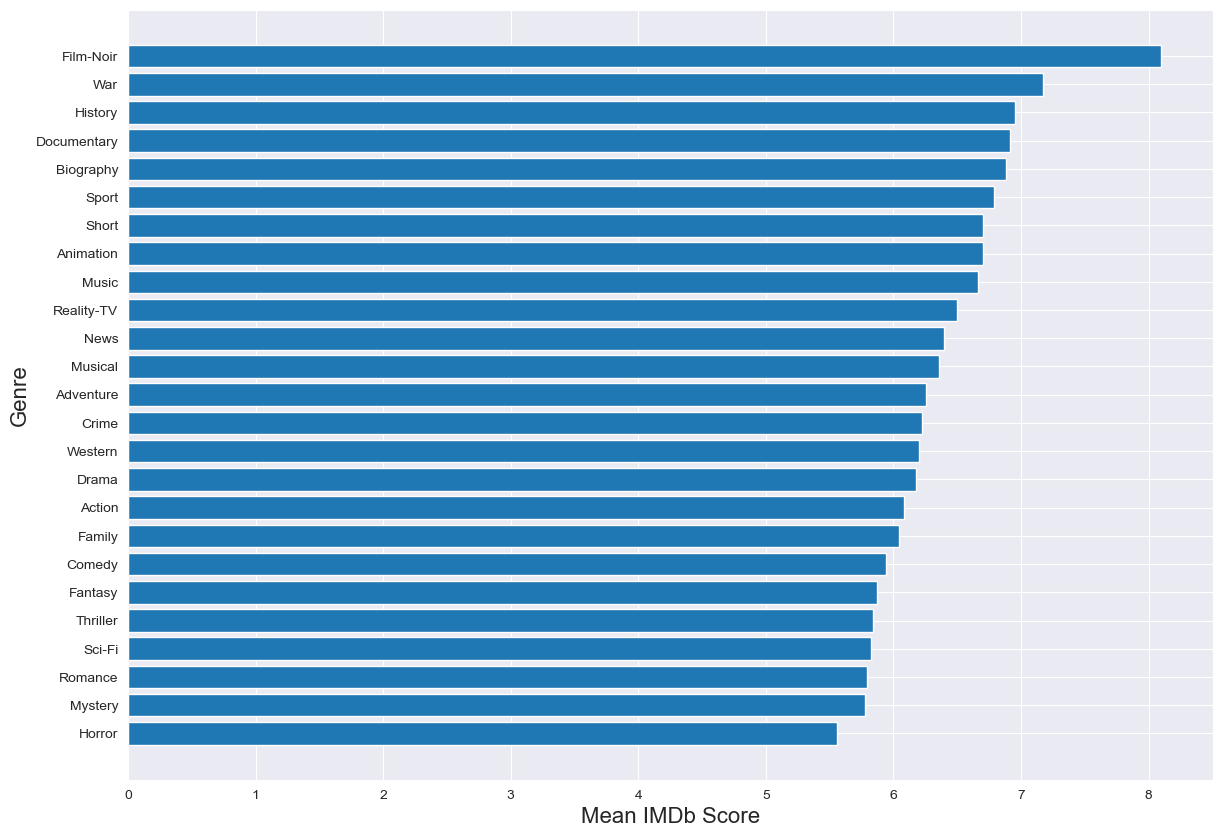

In [151]:
#one hot encode genre
genre_dummies = netflix["Genre"].str.get_dummies(sep=", ") #creates dummy variables based on genres available in each row
netflix_genre_dummies = pd.concat([netflix, genre_dummies], axis=1) #concatenates above df to original df.

genre_scores = {}

for genre in genre_dummies.columns:
    mean_imdb = netflix_genre_dummies[netflix_genre_dummies[genre]==1]["IMDb Score"].mean() #finding the mean imdb score for each column where given genre is present.
    genre_scores[genre] = mean_imdb #stores the mean imdb score in the dictionair created earlier.

genre_scores_df = pd.DataFrame(list(genre_scores.items()), columns=["Genre", "Mean IMDb Score"])
genre_scores_df = genre_scores_df.sort_values("Mean IMDb Score", ascending=True)

print(genre_scores_df)

plt.figure(figsize=(14,10))
plt.barh(genre_scores_df["Genre"], genre_scores_df["Mean IMDb Score"])
plt.xlabel("Mean IMDb Score", fontsize=16)
plt.ylabel("Genre",fontsize=16)
plt.show()

- Film Noir(8.10) had the highest mean IMDb score, whereas Horror(5.55) had the lowest score. There is a clear influence of Genre on IMDb Score.
- NOTE: Film Noir has the lowest sum of movies under its genre, so its mean rating is easily influenced by a few high scores.
- Movie producers can use this information to advise their script writers on what genre of productions are popular.

---
## Rating

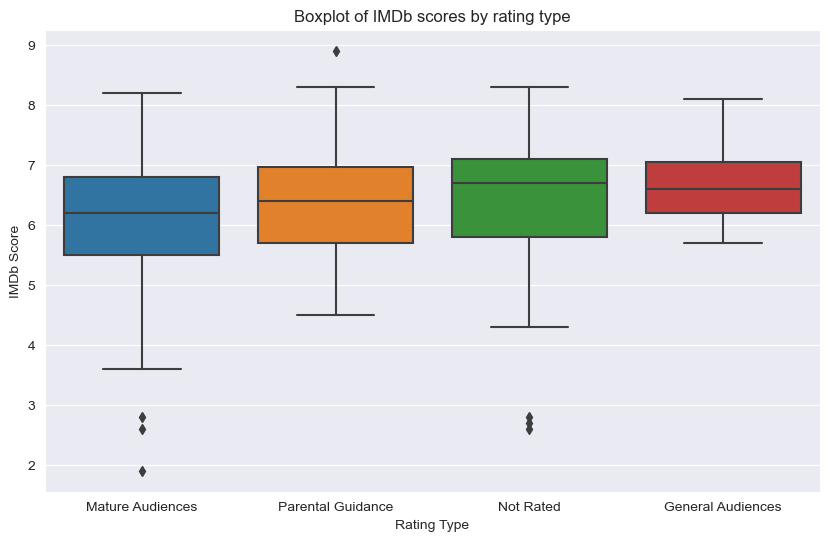

In [152]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Rated", y="IMDb Score", data=netflix)
plt.title("Boxplot of IMDb scores by rating type")
plt.xlabel("Rating Type")
plt.ylabel("IMDb Score")
plt.show()

In [153]:
mean_rating_scores = netflix.groupby("Rated")["IMDb Score"].agg(np.mean)
mean_rating_scores

Rated
General Audiences    6.725000
Mature Audiences     6.139076
Not Rated            6.469159
Parental Guidance    6.389655
Name: IMDb Score, dtype: float64

- Films that were not rated had the highest median scores. 
- However, films that were rated for general audiences had the highest mean scores, whilst films for mature audiences had the lowest mean scores.
---

## Conclusions

The main findings of this EDA notebook include, but are not limited by: 

The Average IMDb score of Netflix Originals is 6.3. This could be a good benchmark for assessing the success of any new productions. 

Although only a weak correlation (-0.07), filmmakers should not make their plot descriptions subjective, as those that do tend to have lower IMDb ratings. 

The most common genres present in the dataset were Drama, Comedy and Documentary, whilst the least common were Reality TV, Film-Noir and News. In terms of genres and their mean scores, the top performers were Film Noir, War, History and Documentary. 

The data showed that September, January, and October were the busiest times in terms of Netflix Original releases. 

Most Netflix Productions were led by the US, followed by the UK and then India. 

The mean number of votes a production received was 26431, with the minimum number being 12 and the maximum being 735336. This metric could be used as an alternative to Box Office data if not available. 

The t-tests carried out showed that the shorter and longer length films performed better than medium length films. 

The highest rated films were those that were rated for general audiences (potentially since these films were more available/appealing to more age groups). 

Univariate Analysis was carried out in this notebook. The implications of these findings can be seen in the ML notebook. 

## Implications: 

These results could be useful for filmakers who want to propel the ratings of their productions. 

 

## Further Work 

Further Analysis could be done on the plot to determine the relationship between n-grams and IMDb score. This would give film makers a better idea of what themes or ideas can make a movie more successful. 

The dataset consists of only 860 films; a relatively small size. A larger dataset could be used to extract more detailed and precise insights. 

The data shows that educational and historic genres such as War and Documentary performed well. This could explain the rise in Netflix Documentaries in the last decade which all follow the same templates, in terms of music, suspense building and cinematography. 

The following notebook will use the dataset to create models that can be used to predict IMDb ratings based on this set of features. 

In [156]:
netflix.to_csv("netflix_ml_prep.csv", index=False) #for external use, as well as use in ML notebook.